In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:

import pandas as pd
import matplotlib.pyplot as plt

files = ["fft_ring_k1.csv", "fft_ring_k2.csv"]

df1 = pd.read_csv(files[0])   # 75k points
df2 = pd.read_csv(files[1])   # 85k points

# # Force df2 to same length as df1
# df2 = df2.iloc[:len(df1)]

# f = df1["Frequency (Hz)"]

# # Plot both
# plt.figure(figsize=(6,4), dpi=150)
# plt.plot(f, df1["Spectrum"], label="Ring k1", linewidth=2)
# plt.plot(f, df2["Spectrum"], label="Ring k2", linewidth=2)

# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Spectrum")
# plt.title("Transmission Spectrum - Ring Port")
# plt.grid(True, color="lightgrey", linestyle="--", linewidth=0.7)
# plt.legend()
# plt.tight_layout()
# plt.show()



In [ ]:
# plt.figure(figsize=(6,4), dpi=150)
# plt.plot(f, df1["Spectrum"], label="Ring k1", linewidth=1.5)
# plt.plot(f, k2_interp, label="Ring k2", linewidth=1.5)

# plt.xlabel("Frequency (Hz)")
# plt.ylabel("Spectrum")
# plt.title("Transmission Spectrum - Ring Port")
# plt.grid(True, color="lightgrey", linestyle="--", linewidth=0.7)
# plt.legend()

# # Zoom into region of interest (example: 1.5e14–2.2e14 Hz)


# plt.tight_layout()
# plt.show()

# Plot both
plt.figure(figsize=(6,4), dpi=150)
plt.plot(f, df1["Spectrum"], label="Ring k1", linewidth=2)
plt.plot(f, df2["Spectrum"], label="Ring k2", linewidth=2)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectrum")
plt.title("Transmission Spectrum - Ring Port")
plt.grid(True, color="lightgrey", linestyle="--", linewidth=0.7)
plt.legend()
plt.xlim(1.5e14, 2.2e14)
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

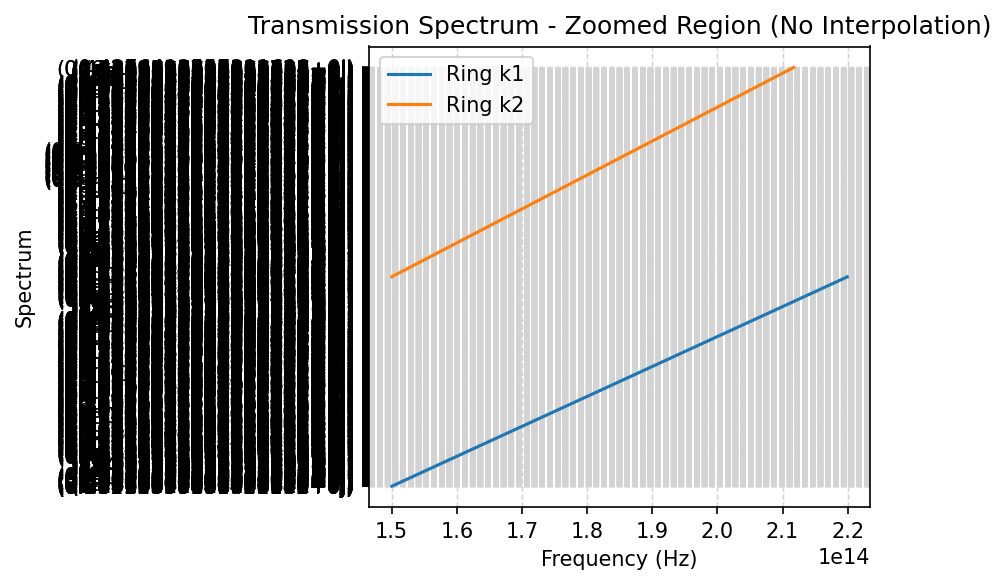

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

files = ["fft_ring_k1.csv", "fft_ring_k2.csv"]

df1 = pd.read_csv(files[0])   # 75k points
df2 = pd.read_csv(files[1])   # 85k points

# Choose frequency window
fmin, fmax = 1.5e14, 2.2e14  

# Slice both datasets to the window
df1_zoom = df1[(df1["Frequency (Hz)"] >= fmin) & (df1["Frequency (Hz)"] <= fmax)]
df2_zoom = df2[(df2["Frequency (Hz)"] >= fmin) & (df2["Frequency (Hz)"] <= fmax)]

# Truncate to the smaller length so they can be plotted together
min_len = min(len(df1_zoom), len(df2_zoom))
df1_zoom = df1_zoom.iloc[:min_len]
df2_zoom = df2_zoom.iloc[:min_len]

# Plot
plt.figure(figsize=(6,4), dpi=150)
plt.plot(df1_zoom["Frequency (Hz)"], df1_zoom["Spectrum"], label="Ring k1", linewidth=1.5)
plt.plot(df2_zoom["Frequency (Hz)"], df2_zoom["Spectrum"], label="Ring k2", linewidth=1.5)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectrum")
plt.title("Transmission Spectrum - Zoomed Region (No Interpolation)")
plt.grid(True, color="lightgrey", linestyle="--", linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()


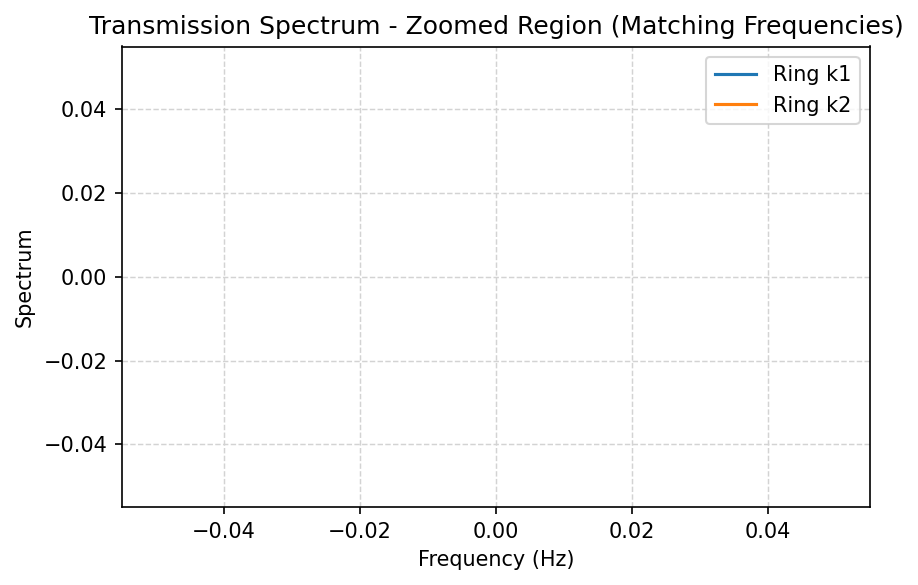

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs
df1 = pd.read_csv("fft_ring_k1.csv")
df2 = pd.read_csv("fft_ring_k2.csv")

# Merge on common frequencies (inner join keeps only matching frequencies)
df_merged = pd.merge(df1, df2, on="Frequency (Hz)", suffixes=("_k1", "_k2"))

# Optional: apply xlim filtering before plotting
fmin, fmax = 1.5e14, 2.2e14
df_zoom = df_merged[(df_merged["Frequency (Hz)"] >= fmin) & (df_merged["Frequency (Hz)"] <= fmax)]

# Plot
plt.figure(figsize=(6,4), dpi=150)
plt.plot(df_zoom["Frequency (Hz)"], df_zoom["Spectrum_k1"], label="Ring k1", linewidth=1.5)
plt.plot(df_zoom["Frequency (Hz)"], df_zoom["Spectrum_k2"], label="Ring k2", linewidth=1.5)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectrum")
plt.title("Transmission Spectrum - Zoomed Region (Matching Frequencies)")
plt.grid(True, color="lightgrey", linestyle="--", linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()


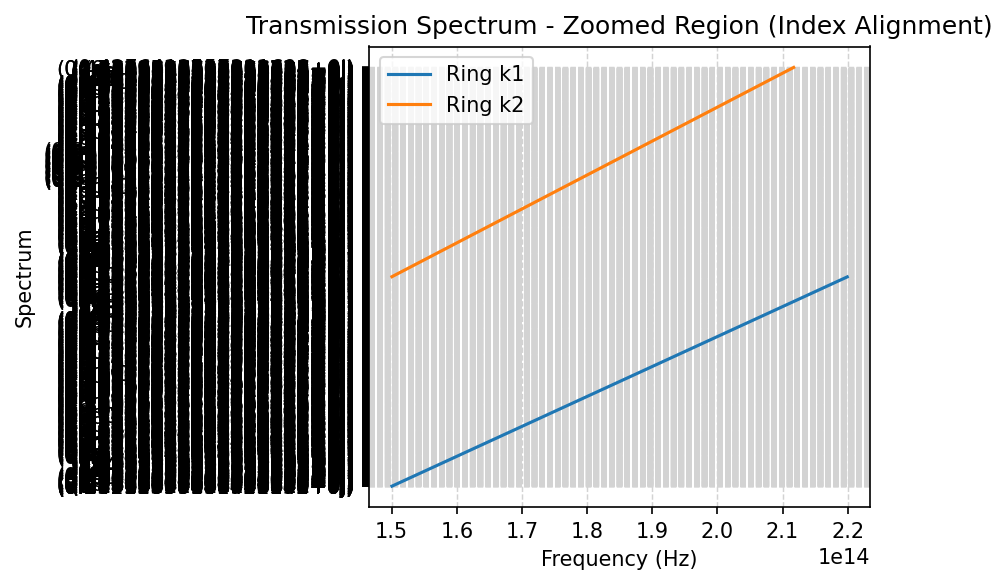

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load CSVs
df1 = pd.read_csv("fft_ring_k1.csv")
df2 = pd.read_csv("fft_ring_k2.csv")

# Choose frequency window
fmin, fmax = 1.5e14, 2.2e14  

# Slice each dataframe independently
df1_zoom = df1[(df1["Frequency (Hz)"] >= fmin) & (df1["Frequency (Hz)"] <= fmax)]
df2_zoom = df2[(df2["Frequency (Hz)"] >= fmin) & (df2["Frequency (Hz)"] <= fmax)]

# Align by index (truncate to same length)
min_len = min(len(df1_zoom), len(df2_zoom))
df1_zoom = df1_zoom.iloc[:min_len]
df2_zoom = df2_zoom.iloc[:min_len]

# Plot
plt.figure(figsize=(6,4), dpi=150)
plt.plot(df1_zoom["Frequency (Hz)"], df1_zoom["Spectrum"], label="Ring k1", linewidth=1.5)
plt.plot(df2_zoom["Frequency (Hz)"], df2_zoom["Spectrum"], label="Ring k2", linewidth=1.5)

plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectrum")
plt.title("Transmission Spectrum - Zoomed Region (Index Alignment)")
plt.grid(True, color="lightgrey", linestyle="--", linewidth=0.7)
plt.legend()
plt.tight_layout()
plt.show()
